<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [575]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [576]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [577]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [578]:
# Answer:
movies.dtypes 

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [579]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [580]:
# Answer:
movies.sort_values(by="duration", inplace=True)
print(movies.head(n=1)) #shortest movie duration
print(movies.tail(n=1)) #longest movie duration

     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

(0, 40)

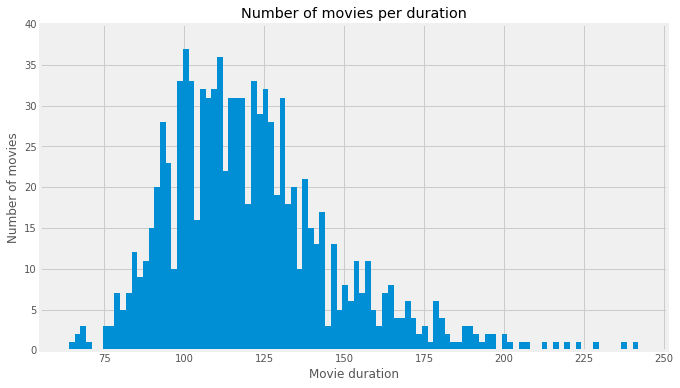

In [581]:
# Answer:
movies.duration.plot.hist(bins=100, figsize=(10,6))
plt.ylabel("Number of movies")
plt.xlabel("Movie duration")
plt.title("Number of movies per duration")
plt.ylim(0,40)

#### Use a box plot to display that same data.

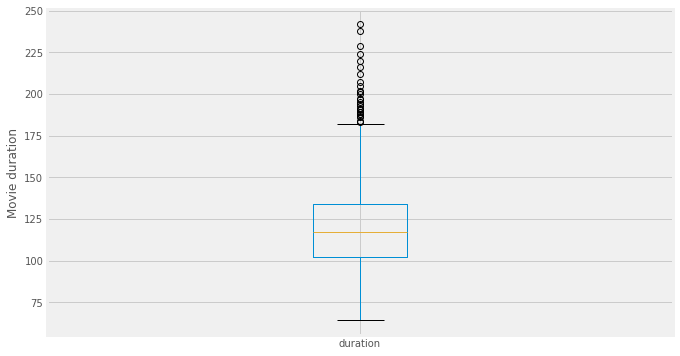

In [582]:
# Answer:
movies.duration.plot(kind="box", figsize=(10,6))
plt.ylabel('Movie duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [583]:
# Answer:
movies.groupby('content_rating').content_rating.count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

(0, 500)

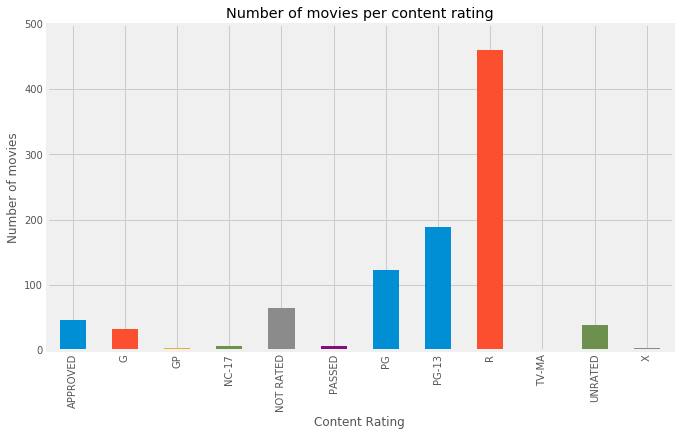

In [584]:
# Answer:
movies.groupby('content_rating').content_rating.count().plot(kind="bar", figsize=(10,6))
plt.xlabel('Content Rating');
plt.ylabel('Number of movies');
plt.title('Number of movies per content rating');
plt.ylim(0,500)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [585]:
# Answer:
movies.replace(to_replace={"content_rating": {"NOT RATED": "UNRATED", "APPROVED": "UNRATED", "PASSED": "UNRATED", "GP": "UNRATED"}}, inplace=True)
movies

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,UNRATED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,UNRATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,UNRATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [586]:
# Answer:
movies.replace(to_replace={"content_rating": {"X": "NC-17", "TV-MA": "NC-17"}}, inplace=True)
movies

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,UNRATED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,UNRATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,UNRATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Count the number of missing values in each column.

In [587]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [588]:
# Answer:
movies[movies.content_rating.isnull()]
movies.content_rating.fillna(value="PG-13", inplace=True) # the 3 movies with missing ratings are rated PG13 on imdb
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [589]:
# Answer:
print(movies[movies.duration >= 120].star_rating.mean())
print(movies[movies.duration < 120].star_rating.mean())

7.948898678414094
7.838666666666663


#### Use a visualization to detect whether there is a relationship between duration and star rating.

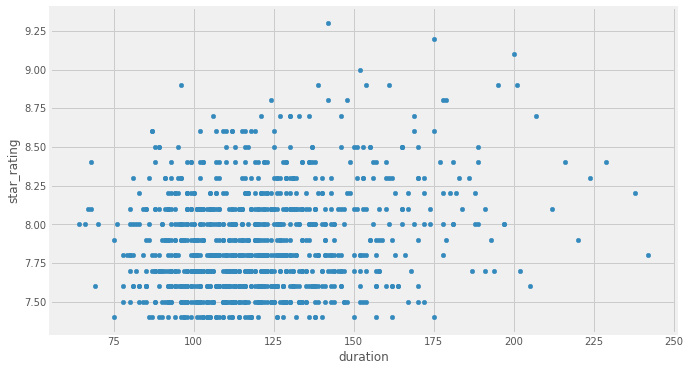

In [590]:
# Answer:
movies.plot.scatter("duration", "star_rating", figsize=(10,6))

In [591]:
# There is not much of a relationship between duration and star rating

#### Calculate the average duration for each genre.

In [592]:
# Answer:
movies.groupby(by="genre").duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

Text(0,0.5,'duration')

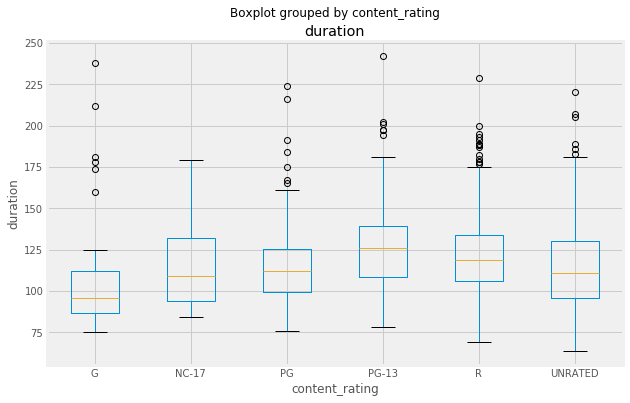

In [593]:
# Answer:
movies.boxplot("duration", by="content_rating", figsize=(10,6))
plt.ylabel("duration")

In [594]:
# Answer:

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [595]:
# Answer:
movies[movies.duplicated('title', keep=False)]

#they are not real duplicates because duration is different

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [596]:
# Answer:
movie_genre = set(movies.genre)
movie_genre_list = list(movie_genre)

for genre in movie_genre_list:
    total_movies = movies[movies.genre == genre].genre.count()
    total_rating = movies[movies.genre == genre].star_rating.sum()
    if(total_movies >= 10):
        average = total_rating / total_movies
        print("The average star rating for genre " + genre + " is " + str(average))

The average star rating for genre Biography is 7.862337662337664
The average star rating for genre Animation is 7.9145161290322585
The average star rating for genre Drama is 7.902517985611511
The average star rating for genre Adventure is 7.933333333333332
The average star rating for genre Horror is 7.806896551724138
The average star rating for genre Comedy is 7.822435897435897
The average star rating for genre Action is 7.884558823529411
The average star rating for genre Crime is 7.916935483870968
The average star rating for genre Mystery is 7.975


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [597]:
# Answer:
value_counts = movies.genre.value_counts() >= 10
genre_list = value_counts[value_counts.values].index
genre_list

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [598]:
# Answer:
movies.groupby('genre').star_rating.mean().where(movies.groupby('genre').genre.count() >= 10).dropna()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [599]:
# Answer:
agg = movies.groupby('genre').star_rating.agg(['count', 'mean'])
agg[agg['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [600]:
# find the actors who have acted together for the most number of movies

movies[movies.actors_list == movies.actors_list.describe().loc['top']]

,star_rating,title,content_rating,genre,duration,actors_list
222,8.1,Harry Potter and the Deathly Hallows: Part 2,PG-13,Adventure,130,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
932,7.4,Harry Potter and the Order of the Phoenix,PG-13,Adventure,138,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
551,7.8,Harry Potter and the Prisoner of Azkaban,PG,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
642,7.7,Harry Potter and the Deathly Hallows: Part 1,PG-13,Adventure,146,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
891,7.5,Harry Potter and the Half-Blood Prince,PG,Adventure,153,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
727,7.6,Harry Potter and the Goblet of Fire,PG-13,Adventure,157,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
